In [28]:
import pandas as pd

# Load the Titanic datasets
train_data = pd.read_csv('/content/Titanic_train.csv')
test_data = pd.read_csv('/content/Titanic_test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
# Check for missing values
missing_values_train = train_data.isnull().sum()
print("Missing values in training data:")
print(missing_values_train[missing_values_train > 0])


Missing values in training data:
Age         177
Cabin       687
Embarked      2
dtype: int64


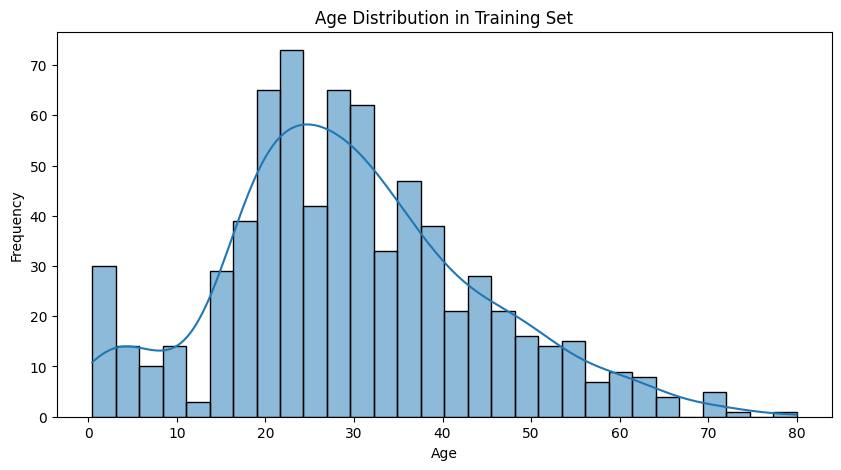

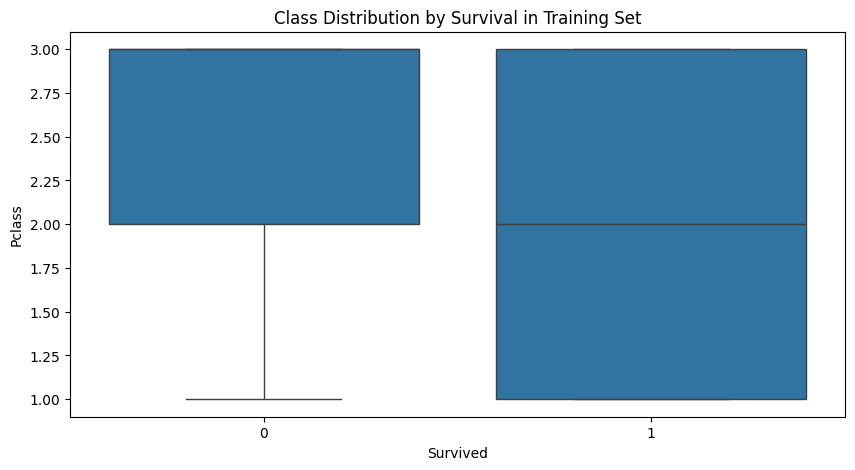

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of age distribution
plt.figure(figsize=(10, 5))
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution in Training Set')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Pclass', data=train_data)
plt.title('Class Distribution by Survival in Training Set')
plt.xlabel('Survived')
plt.ylabel('Pclass')
plt.show()



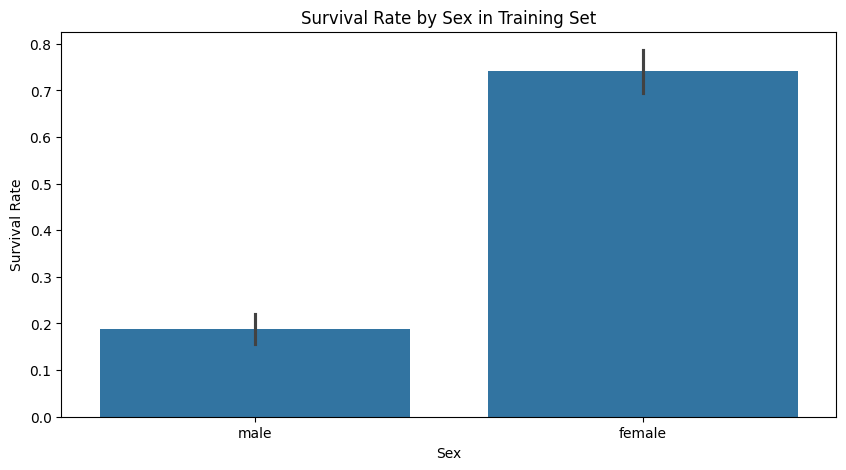

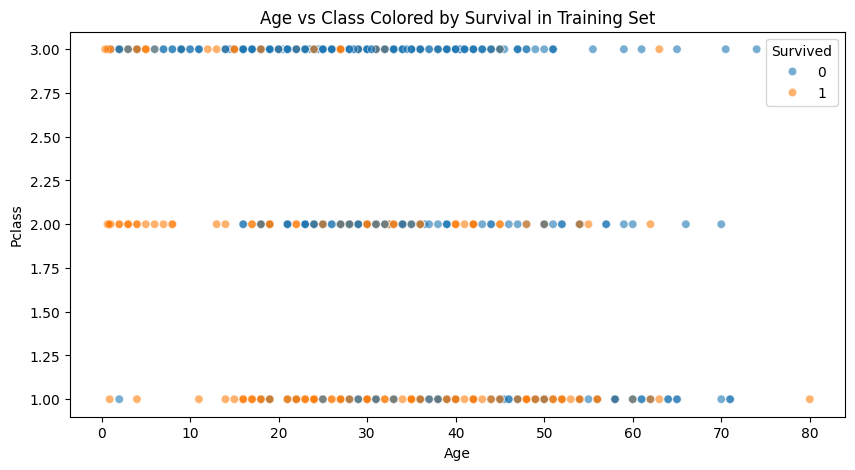

In [31]:
# Bar plot of survival by sex
plt.figure(figsize=(10, 5))
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Sex in Training Set')
plt.ylabel('Survival Rate')
plt.show()

# Scatter plot of age vs. class colored by survival
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Pclass', hue='Survived', data=train_data, alpha=0.6)
plt.title('Age vs Class Colored by Survival in Training Set')
plt.xlabel('Age')
plt.ylabel('Pclass')
plt.legend(title='Survived')
plt.show()


In [32]:

train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

<ipython-input-32-f050d84d189b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)


In [33]:
# Drop 'Cabin' since it has too many unique values for basic encoding
train_data.drop(['Cabin'], axis=1, inplace=True)

# Convert 'Embarked' to one-hot encoding
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)

# Drop non-numeric columns that will not be used in the model
train_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# Impute missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)  # Make sure Fare is imputed if needed

# Check the remaining columns and their data types
print(train_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(1)
memory usage: 50.6+ KB
None


<ipython-input-33-4c34ac6ef2eb>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-33-4c34ac6ef2eb>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [35]:
# Define features and target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Convert 'Sex' to numerical using one-hot encoding
X_train = pd.get_dummies(X_train, columns=['Sex'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Sex'], drop_first=True) # Apply to X_test as well

# Now you can train the model
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Initialize models
lgbm_model = LGBMClassifier()
xgb_model = XGBClassifier()

# Train the models
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predictions
lgbm_pred = lgbm_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Evaluate LightGBM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
lgbm_precision = precision_score(y_test, lgbm_pred)
lgbm_recall = recall_score(y_test, lgbm_pred)
lgbm_f1 = f1_score(y_test, lgbm_pred)

# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

# Print results
print(f"LightGBM - Accuracy: {lgbm_accuracy}, Precision: {lgbm_precision}, Recall: {lgbm_recall}, F1 Score: {lgbm_f1}")
print(f"XGBoost - Accuracy: {xgb_accuracy}, Precision: {xgb_precision}, Recall: {xgb_recall}, F1 Score: {xgb_f1}")


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
